<a href="https://colab.research.google.com/github/MichelaPascale/AI_Python/blob/main/Notebook_training2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Operazioni preliminari**

In [62]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [120]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [90]:
training_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,y,y,t,a,f,c,b,p,e,r,s,y,w,w,p,w,o,p,n,y,p
1,p,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,v,u
2,e,f,f,e,t,n,f,c,b,w,t,b,s,s,p,w,p,w,o,p,n,y,d
3,p,k,y,n,f,s,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,l
4,p,f,y,y,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,p,f,f,g,f,f,f,c,b,g,e,b,k,k,b,n,p,w,o,l,h,v,g
5195,p,k,s,e,f,y,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,p
5196,e,x,s,g,f,n,f,w,b,p,t,e,f,s,w,w,p,w,o,e,n,a,g
5197,p,f,s,e,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,d


In [82]:
test_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,f,s,b,t,n,f,c,b,w,e,?,s,s,w,e,p,w,t,e,w,c,w
1,e,b,f,w,f,n,f,w,b,g,e,?,s,k,w,w,p,w,t,p,w,n,g
2,e,f,y,b,t,n,f,c,b,w,e,?,s,s,e,w,p,w,t,e,w,c,w
3,e,f,s,w,f,n,f,w,b,h,t,e,s,s,w,w,p,w,o,e,k,a,g
4,p,x,s,b,t,f,f,c,b,p,t,b,f,s,w,w,p,w,o,p,h,v,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,p,x,s,e,f,s,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,l
1296,p,x,y,e,f,y,f,c,n,b,t,?,k,k,w,w,p,w,o,e,w,v,d
1297,p,f,y,b,t,n,f,c,b,w,e,b,s,s,w,w,p,w,t,p,r,v,m
1298,e,f,y,g,t,n,f,c,b,p,t,b,s,s,p,p,p,w,o,p,k,v,d


##**2. Trasformazione dati**

In [121]:
#Concateno i due csv
data = pd.concat([training_data, test_data])

In [108]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,y,y,t,a,f,c,b,p,e,r,s,y,w,w,p,w,o,p,n,y,p
1,p,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,v,u
2,e,f,f,e,t,n,f,c,b,w,t,b,s,s,p,w,p,w,o,p,n,y,d
3,p,k,y,n,f,s,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,l
4,p,f,y,y,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,p,x,s,e,f,s,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,l
1296,p,x,y,e,f,y,f,c,n,b,t,?,k,k,w,w,p,w,o,e,w,v,d
1297,p,f,y,b,t,n,f,c,b,w,e,b,s,s,w,w,p,w,t,p,r,v,m
1298,e,f,y,g,t,n,f,c,b,p,t,b,s,s,p,p,p,w,o,p,k,v,d


In [122]:
# Cambio i valori della colonna class in 0 e 1
data["class"] = [1 if i == "p" else 0 for i in data["class"]]

# Tolgo la colonna veil-type perché ha tutti i valori uguali a p => è una colonna superflua
data.drop("veil-type",axis=1,inplace=True)

In [123]:
#Ora modifico i valori delle features, in modo tale da avere solo numeri interi o floats e non più lettere

#Per distinguere le varie lettere all'interno di una colonna faccio in questo modo:
#- Se ho 2 valori diversi per colonna => ad uno associo 1 e all'altro 0
#- Se ho 3 valori diversi per colonna => ad uno associo 1, all'altro 0 e all'altro ancora 0.5
#- Se ho 4 valori diversi per colonna => ad uno associo 1, all'altro 0, all'altro 0.33 e all'altro ancora 0.67
# => Per calcolare questi valori uso la seguente formula matematica: 1/(len(data[column].unique())-1)

for column in data.drop(["class"], axis=1).columns:
    value = 0  #valore di base
    step = 1/(len(data[column].unique())-1)
    for i in data[column].unique():
        data[column] = [value if letter == i else letter for letter in data[column]]
        value += step

In [126]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.090909,0.0,0.25,0.000000,0.333333,0.000,0.000,0.0,0.0,0.00,0.000,0.2,0.166667
2,0,0.2,0.333333,0.222222,0.0,0.250,0.0,0.0,0.0,0.181818,1.0,0.50,0.000000,0.333333,0.125,0.000,0.0,0.0,0.00,0.000,0.0,0.333333
3,1,0.4,0.000000,0.111111,1.0,0.375,0.0,0.0,1.0,0.272727,1.0,0.75,0.333333,0.333333,0.000,0.000,0.0,0.0,0.25,0.125,0.2,0.500000
4,1,0.2,0.000000,0.000000,1.0,0.500,0.0,0.0,0.0,0.363636,0.0,0.50,0.333333,0.666667,0.250,0.125,0.0,0.0,0.50,0.250,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1,0.0,0.666667,0.222222,1.0,0.375,0.0,0.0,1.0,0.272727,1.0,0.75,0.333333,0.333333,0.000,0.000,0.0,0.0,0.25,0.125,0.2,0.500000
1296,1,0.0,0.000000,0.222222,1.0,0.750,0.0,0.0,1.0,0.272727,1.0,0.75,0.333333,0.666667,0.000,0.000,0.0,0.0,0.25,0.125,0.2,0.333333
1297,1,0.2,0.000000,0.666667,0.0,0.250,0.0,0.0,0.0,0.181818,0.0,0.50,0.000000,0.333333,0.000,0.000,0.0,0.5,0.00,0.875,0.2,1.000000
1298,0,0.2,0.000000,0.444444,0.0,0.250,0.0,0.0,0.0,0.000000,1.0,0.50,0.000000,0.333333,0.125,0.125,0.0,0.0,0.00,0.375,0.2,0.333333


##**3. Lettura dei dati in training set e test set**

In [125]:
len_train = len(training_data)
len_test = len(test_data)

y_train = data[:len_train]["class"].values    #prendo la colonna "class" e inserisco i valori in un array
x_train = data[:len_train].drop(["class"], axis=1).values   # Inserisco in un array di array tutte le altre features tranne la colonna "class"

y_test = data[len_train:]["class"].values
x_test = data[len_train:].drop(["class"], axis=1).values

##**4. Classificazione**

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
# creo il classificatore con K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [113]:
print("Test set predictions:", clf.predict(x_test))

Test set predictions: [0 0 0 ... 1 0 0]


In [114]:
print("Test set accuracy: {:.2f}%".format(clf.score(x_test, y_test)*100))

Test set accuracy: 99.85%


##**5. Analisi su grafico**

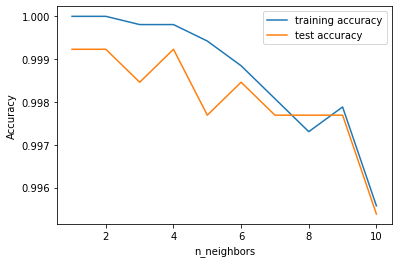

In [105]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()